Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Файл доступен тут -

https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:

**satisfaction_level** - Уровень удовлетворенности работой

**Last_evaluation** - Время с момента последней оценки в годах

**number_projects** - Количество проектов, выполненных за время работы

**average_monthly_hours** - Среднее количество часов на рабочем месте в месяц

**time_spend_company** - Стаж работы в компании в годах

**work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником

**left** - уволился ли сотрудник

**promotion_last_5years** - повышался ли сотрудник за последние пять лет

**department** - отдел в котором работает сотрудник

**salary** - относительный уровень зарплаты

#### <span style="color:red">1 Загрузите файл HR.csv в pandas dataframe - 5 Баллов</span>

In [498]:
import pandas as pd
import numpy as np
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
from scipy import stats as st
import pylab

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import pyLDAvis
from IPython.core.display import HTML


import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

In [2]:
#Загрузка локального файла
# df=pd.read_csv('HR.csv')
# df
#Загрузка сразу их google sheet
HR = r'https://docs.google.com/spreadsheets/d/e/2PACX-1vQm80UaK36fFj6yRInCCOHUyjUkERjT7heZE2-5Gi9ThRyzfWTCBV9rA3DosXPKHaHzC_7DHyw-eTzw/pub?gid=784098560&single=true&output=csv'
df = pd.read_csv(HR) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#### <span style="color:red">2 Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение) - 10 Баллов</span>


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


#### <span style="color:red">3. Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные - 10 Баллов</span>


In [499]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


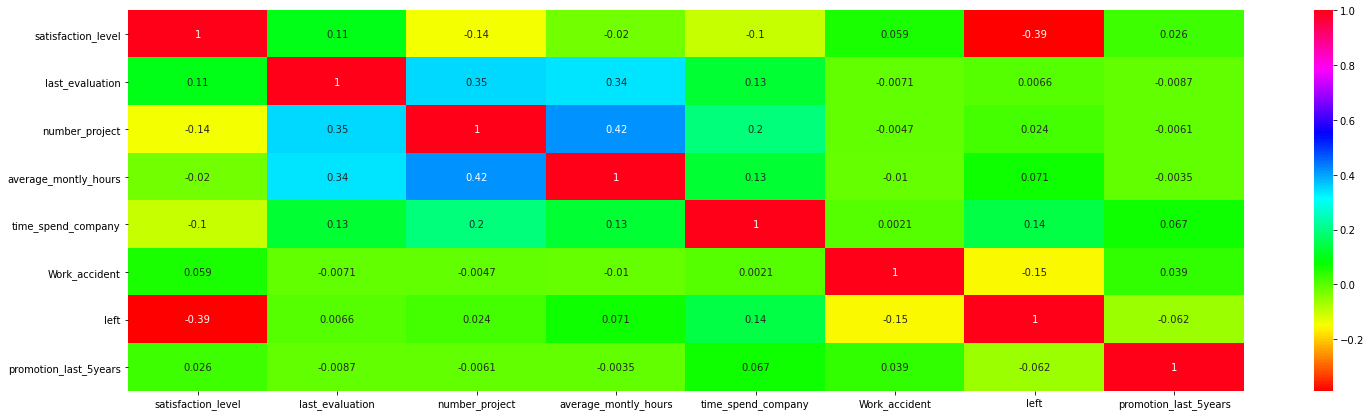

In [623]:
fig = plt.subplots(figsize=(25, 7))
fig = sns.heatmap(df.corr(), cmap="hsv", annot=True)


In [522]:
# Удаление шума
def remove_noise_value(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# получаение абсолютных значений корреляционных пар
def get_best_corr(df, corr, ascending, n=2):
    labels_to_drop = remove_noise_value(df.select_dtypes(include=np.number))
    au_corr = corr.drop(labels=labels_to_drop).sort_values(ascending=ascending)
    return au_corr[0:n]

In [523]:
#наиболее скоррелированные переменные
au_corr = df.corr().abs().unstack()
print (get_best_corr(df, au_corr, False))

number_project      average_montly_hours    0.417211
satisfaction_level  left                    0.388375
dtype: float64


In [524]:
#наименее скоррелированные переменные
get_best_corr(df, au_corr, True)

time_spend_company    Work_accident            0.002120
average_montly_hours  promotion_last_5years    0.003544
dtype: float64

#### <span style="color:red"> 4. Рассчитайте сколько сотрудников работает в каждом департаменте - 5 баллов.</span>

In [525]:
df[df.left == 0].groupby('department').agg({'left': 'count'}).rename(columns = {'left': 'employees'})

,employees
department,
IT,954
RandD,666
accounting,563
hr,524
management,539
marketing,655
product_mng,704
sales,3126
support,1674


#### <span style="color:red"> 5. Показать распределение сотрудников по зарплатам - 5 баллов.</span>


In [526]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

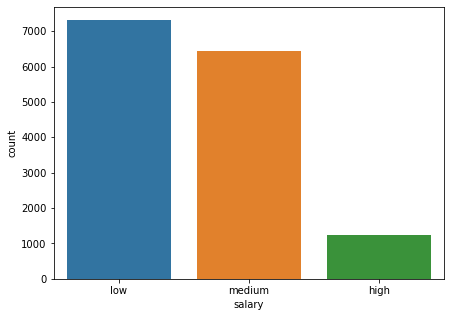

In [453]:
sns.countplot(x='salary', data=df)
plt.show()

#### <span style="color:red"> 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности - 5 баллов.</span>



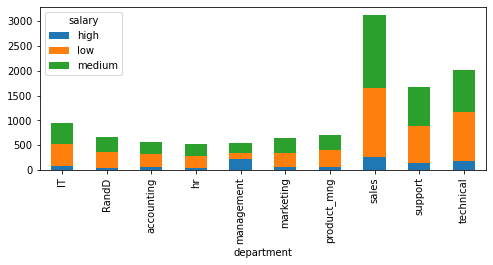

In [527]:
pd.pivot_table(df[df.left == 0], values='left',
               index='department', columns='salary',
               aggfunc='count').plot(kind='bar', stacked=True)

#### <span style="color:red"> 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низкимокладом - 10 баллов.</span>




In [528]:
#выводим среднюю статистику относительно уровня зарплаты и часов на работе
df.groupby('salary')['average_montly_hours'].mean()

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64

Вводим гипотезы.

**H0:** Сотрудники с высоким окладом проводят на работе не больше времени, чем сотрудники с низким окладом.

**H1:** Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

In [529]:
#Расчитаем по T-тесту Стьюдента
alpha = 0.05

result = st.ttest_ind(df[df.salary == 'high']['average_montly_hours'], df[df.salary == 'low']['average_montly_hours'], equal_var=False)
print(result)
if (result.statistic > 0) & (result.pvalue/2 < alpha):
    print('сотрудники с высоким окладом проводят на работе больше времени')
else:
    print('сотрудники с высоким окладом не проводят на работе больше времени')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
сотрудники с высоким окладом не проводят на работе больше времени


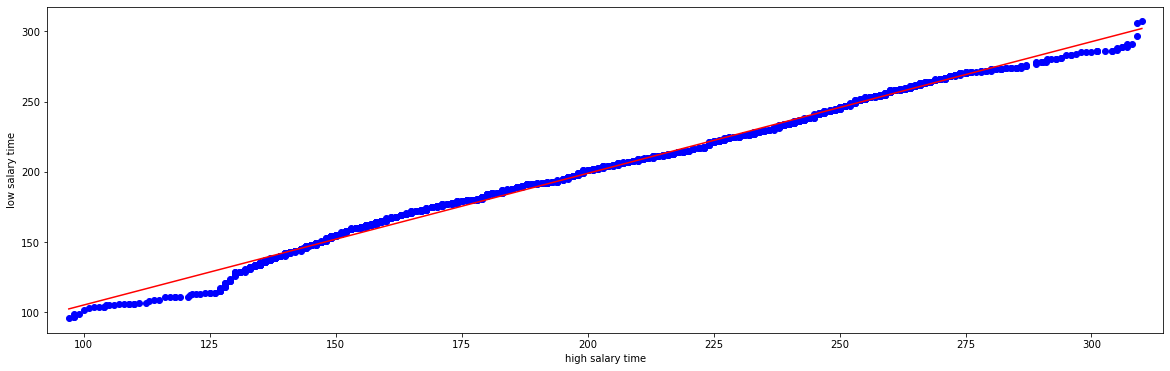

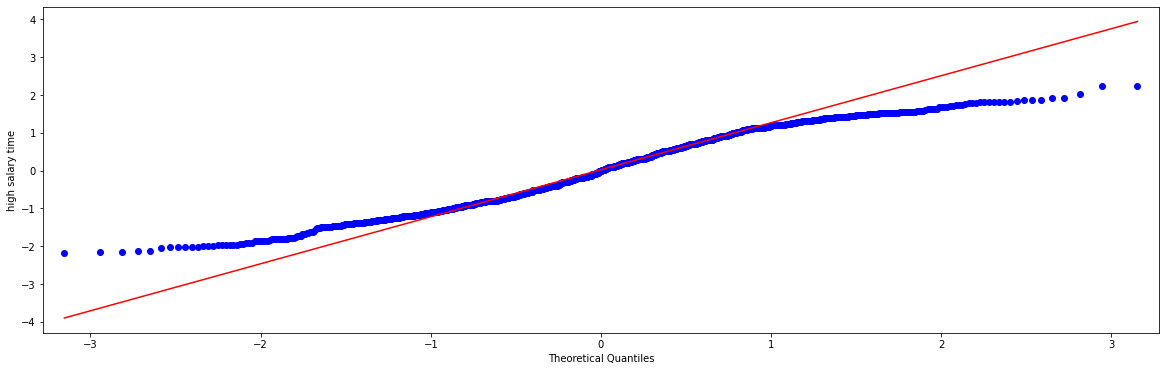

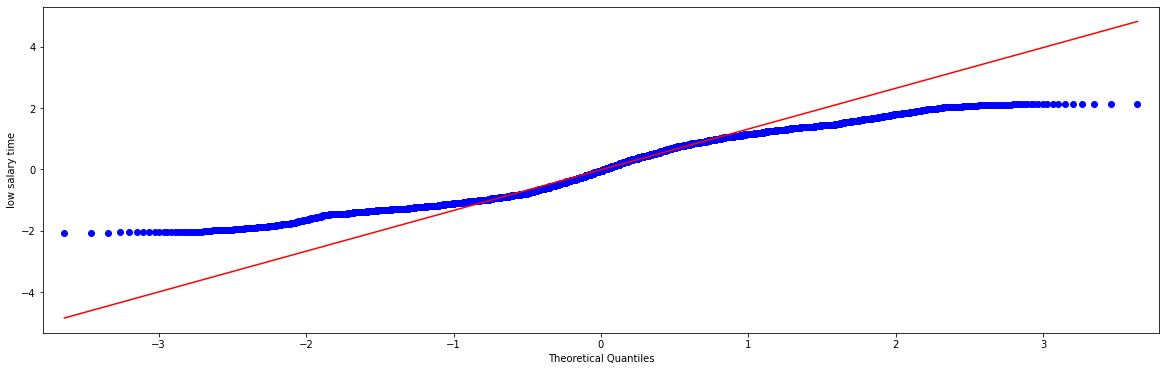

In [532]:
plt.rcParams["figure.figsize"] = (20,6)
#по квантильному графику на основании T-теста отвергаем проверочну гипотезу 
x = df[df.salary == 'high']['average_montly_hours']
y = df[df.salary == 'low']['average_montly_hours']
pp_x = sm.ProbPlot(x)
pp_y = sm.ProbPlot(y)
fig = qqplot_2samples(pp_x, pp_y, xlabel='high salary time', ylabel='low salary time', line="r", ax= None)
fig = sm.qqplot(df[df.salary == 'high']['average_montly_hours'],ylabel='high salary time', fit=True, line="q")
fig = sm.qqplot(df[df.salary == 'low']['average_montly_hours'], ylabel='low salary time', fit=True, line="q")
plt.show()

#### <span style="color:red"> 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности)  - 10 баллов. :</span> 
    ● Доля сотрудников с повышением за последние 5 лет;
    ● Средняя степень удовлетворенности:
    ● Среднее количество проектов
  





In [19]:
# Доля сотрудников с повышением за последние 5 лет
fired_prom = df[(df.left == 1) & (df.promotion_last_5years == 1)].shape[0] / df[df.left == 1].shape[0]
work_prom = df[(df.left == 0) & (df.promotion_last_5years == 1)].shape[0] / df[df.left == 0].shape[0]
print ('Доля повышений среди уволившихся сотрудников - ', fired_prom)
print ('Доля повышений среди работающих сотрудников - ', work_prom)

Доля повышений среди уволившихся сотрудников -  0.005320638476617194
Доля повышений среди работающих сотрудников -  0.026251312565628283


In [20]:
# Средняя степень удовлетворенности
fired_sat = df[df.left == 1]["satisfaction_level"].mean()
work_sat = df[df.left == 0]["satisfaction_level"].mean()
print ('Удовлетворенность среди уволившихся сотрудников - ', fired_sat)
print ('Удовлетворенность среди работающихя сотрудников - ', work_sat)

Удовлетворенность среди уволившихся сотрудников -  0.44009801176140917
Удовлетворенность среди работающихя сотрудников -  0.666809590479516


In [21]:
# Количество проектов
fired_np = df[df.left == 1]["number_project"].mean()
work_np = df[df.left == 0]["number_project"].mean()
print ('Количество проектов среди уволившихся сотрудников - ', fired_np)
print ('Количество проектов среди работающих сотрудников - ', work_np)

Количество проектов среди уволившихся сотрудников -  3.8555026603192384
Количество проектов среди работающих сотрудников -  3.786664333216661


#### <span style="color:red"> 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department иsalary)Оценить качество модели на тестовой выборки - 20 баллов</span> 


In [484]:
X = df.drop(['Work_accident', 'left', 'average_montly_hours', 'department', 'salary', 'number_project', 'promotion_last_5years', 'time_spend_company'], axis=1)
y = df.left
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005)

In [485]:
X

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


In [156]:
len(y_test)

150

In [24]:
lda = LinearDiscriminantAnalysis()

In [151]:
lda = LDA()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [157]:
lda.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [158]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,left,Unnamed 0
151,1.0,NaN
14719,1.0,NaN
7484,0.0,NaN
744,1.0,NaN
8263,0.0,NaN
...,...,...
3423,0.0,NaN
4967,0.0,NaN
7655,0.0,NaN
13185,0.0,NaN


In [464]:
accuracy_score(y_test, lda.predict(X_test))

0.76

In [467]:
lda.coef_

array([[-4.38983411,  0.77085446]])

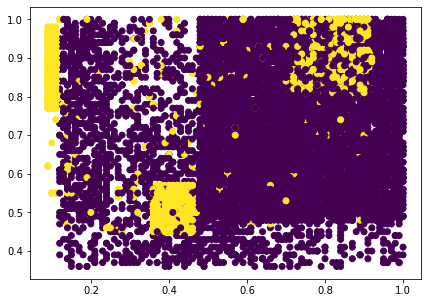

In [468]:
plt.rcParams["figure.figsize"] = (7,5)
plt.scatter(X_train['satisfaction_level'], X_train['last_evaluation'], c=y_train)
plt.show()

In [ ]:
conda install -c anaconda scikit-learn

In [471]:
#variability 
def dataset_cov():
    C = y_train
    X = df.drop(['Work_accident', 'left', 'average_montly_hours', 'department', 'salary', 'number_project', 'promotion_last_5years', 'time_spend_company'], axis=1)
    y = df.left
    return X, y

In [633]:
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
        
    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

    return splot

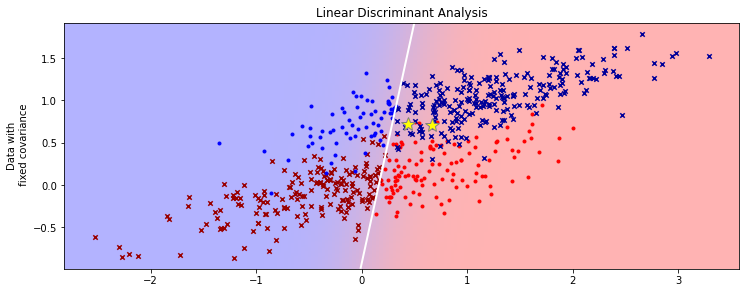

In [631]:
plt.figure(figsize=(20, 8), facecolor='white')
for i, (X, y) in enumerate([dataset_fixed_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X_train, y_train).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=1)
    plt.axis('tight')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [474]:
lda.coef_

array([[-4.38983411,  0.77085446]])

IndentationError: unexpected indent (<ipython-input-480-c0208e29cb4a>, line 2)

In [475]:
print (lda.fit(X_train, y_train).predict(X))

[0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1
 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0
 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1
 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0
 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0
 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 

In [476]:
print (lda.fit(X_test, y_test).predict(X))

[0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1
 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1
 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0
 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0
 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0
 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 

In [477]:
print ('Train', accuracy_score(y_train, lda.predict(X_train))),
print ('Test', accuracy_score(y_test, lda.predict(X_test)))
print ('DF', accuracy_score(y, lda.predict(X)))

Train 0.78584829804342
Test 0.7866666666666666
DF 0.38


точность не очень =) 
поскольску максимальная удаленность медиан классов друг от друга мала (примерно 5-6 раз) оба этих класса влияют на вероятность увольнения сотрудника